In [49]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import sklearn.metrics as metrics
import sklearn.datasets as datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from itertools import *
import statsmodels.formula.api as smf
import sklearn.datasets as datasets
import sklearn.model_selection as model_selection
import statsmodels.stats.api as sms
import os
os.chdir('/Users/adalabilbekov/Desktop/data')

In [50]:
df = pd.read_csv('Credit.csv')

In [51]:
df

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,14.891,3606,283,2,34,11,No,No,Yes,South,333
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903
2,104.593,7075,514,4,71,11,No,No,No,West,580
3,148.924,9504,681,3,36,11,Yes,No,No,West,964
4,55.882,4897,357,2,68,16,No,No,Yes,South,331
...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,No,No,Yes,South,560
396,13.364,3838,296,5,65,17,No,No,No,East,480
397,57.872,4171,321,5,67,12,Yes,No,Yes,South,138
398,37.728,2525,192,1,44,13,No,No,Yes,South,0


In [52]:
df.Own = df.Own.map(dict(Yes=1, No=0))
df.Student = df.Student.map(dict(Yes=1, No=0))
df.Married = df.Married.map(dict(Yes=1, No=0))

In [53]:
df = df.drop('Region', axis=1)

# Task 1
y = student
x = all other variables
### Tasks to do:
1. Produce some numerical and graphical summaries of data (pairplot, correlation matrix, boxplot).
2. Perform a Logistic Regression and use the summary function to show the results. Describe which variables
are statistically significant. Divide data in proportion 80/20 (Train/Test).
3. Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix
is telling you about the types of mistakes made by logistic regression
4. Repeat the step 2-3 with LDA.
5. Repeat the step 2-3 with QDA.
6. Repeat the step 2-3 with KNN (k=1,5,10).
7. Compare the results of Logistic Regression, LDA, QDA and best KNN. Describe and comment the
comparison.
8. Repeat the step 2-3 with 5-fold and 10-fold cross validation.
9. Compare the results of Logistic Regression with 80/20, 5-fold, 10-fold. Describe and comment the
comparison.

1) Produce some numerical and graphical summaries of data (pairplot, correlation matrix, boxplot).

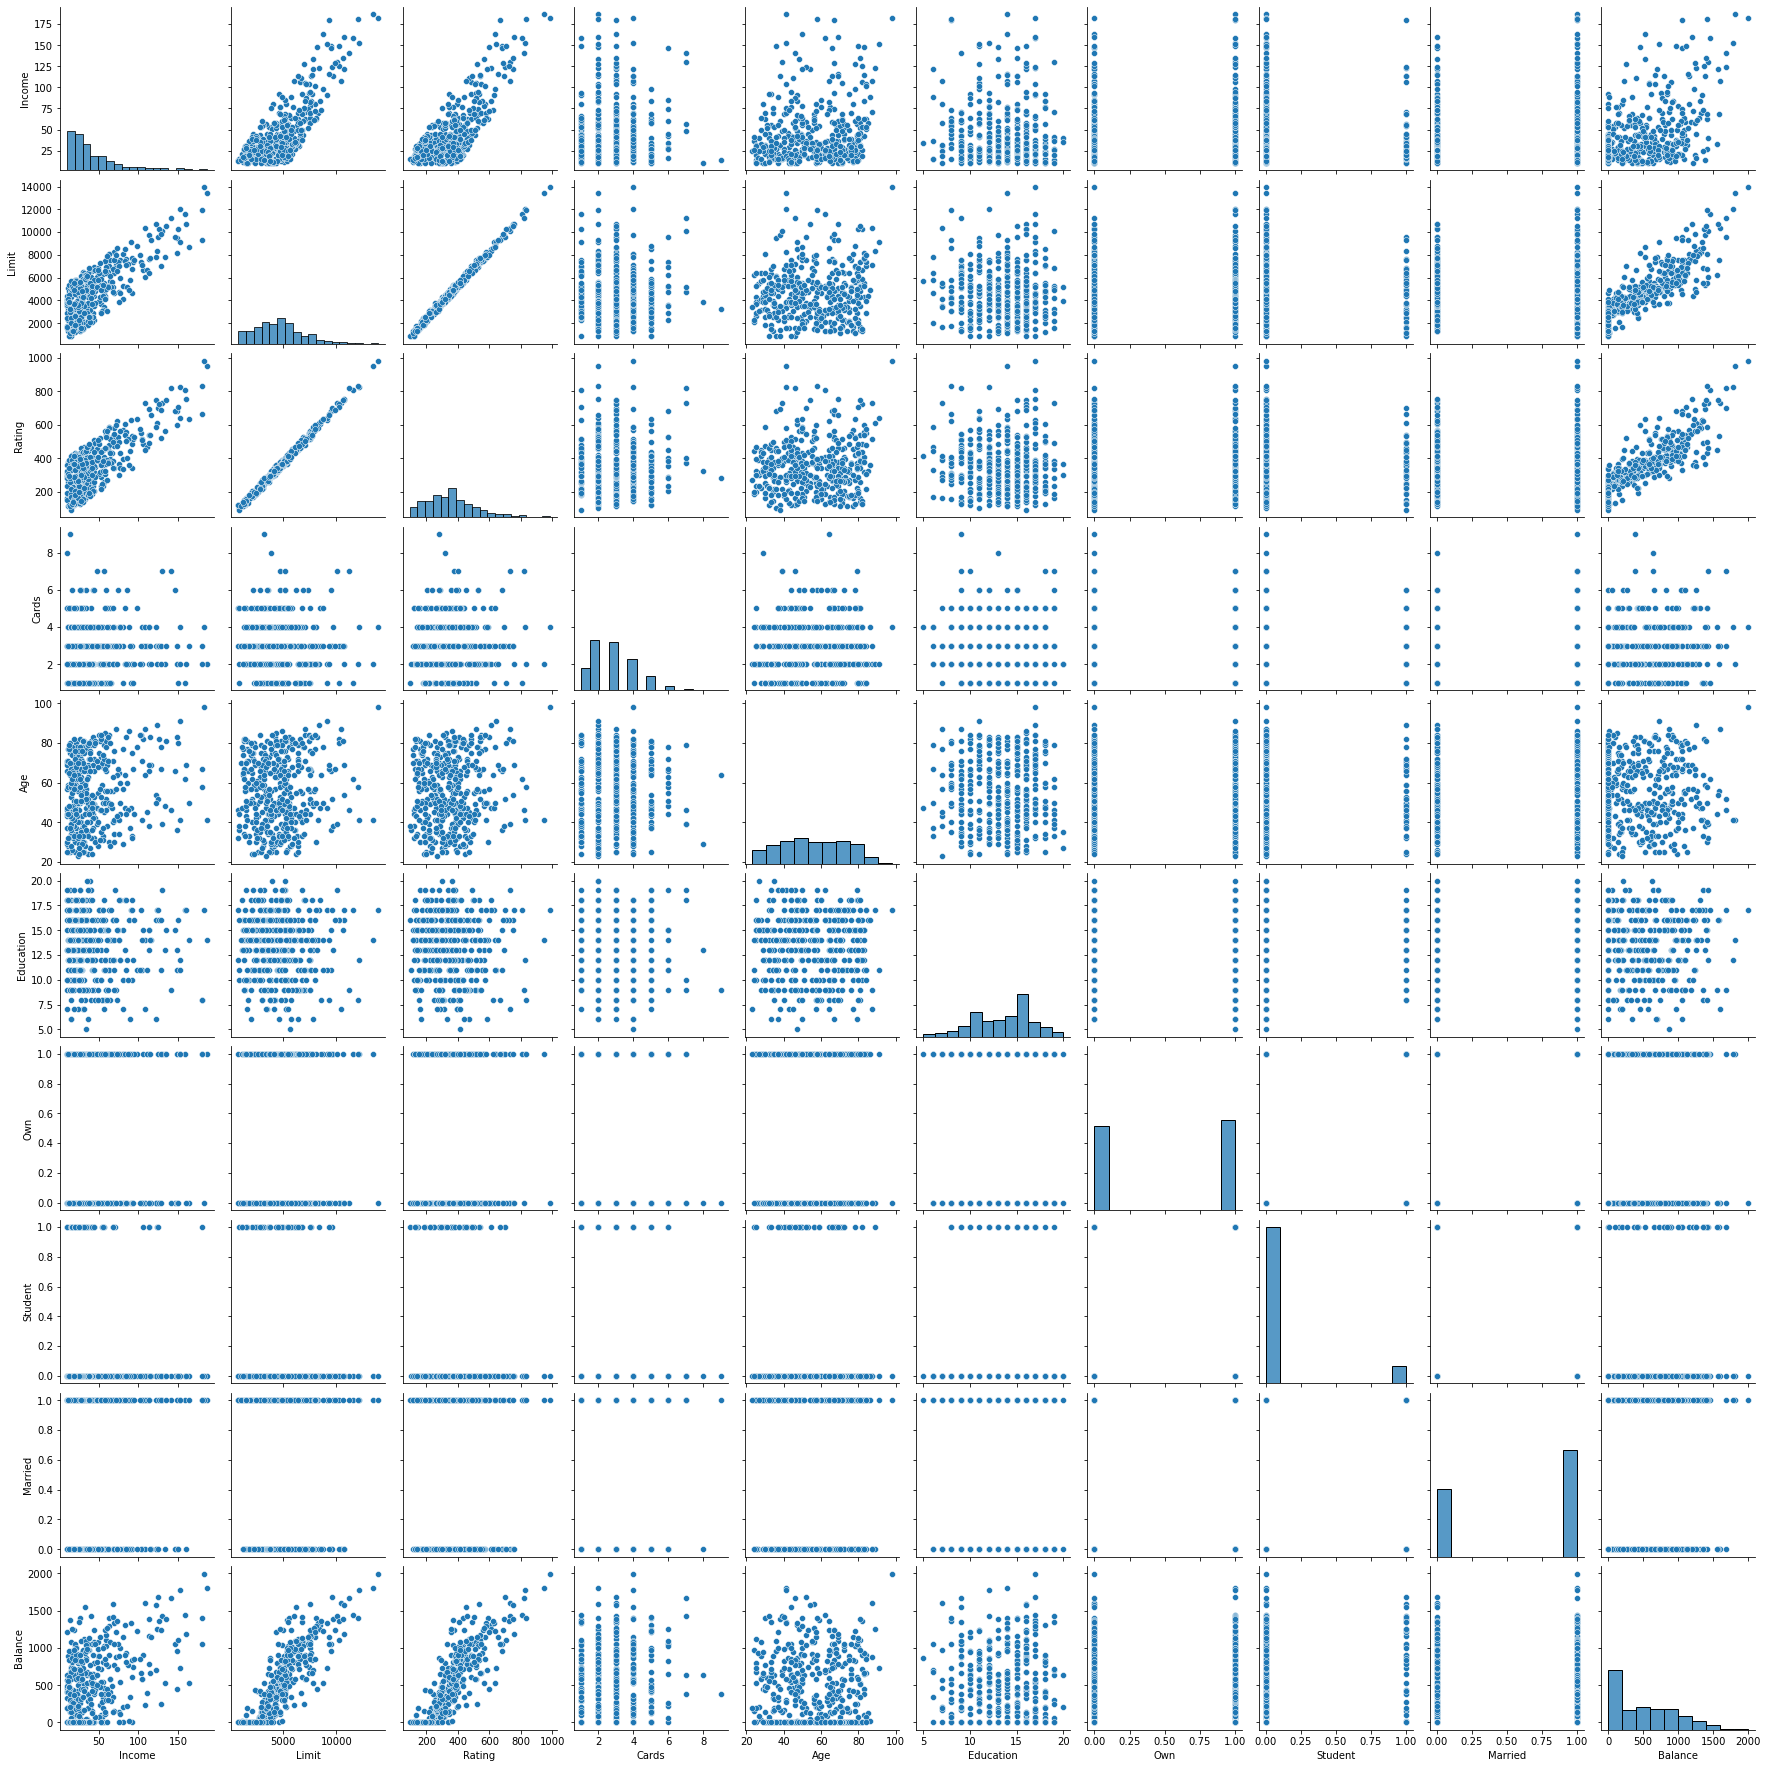

In [54]:
sns.pairplot(df)

<AxesSubplot:>

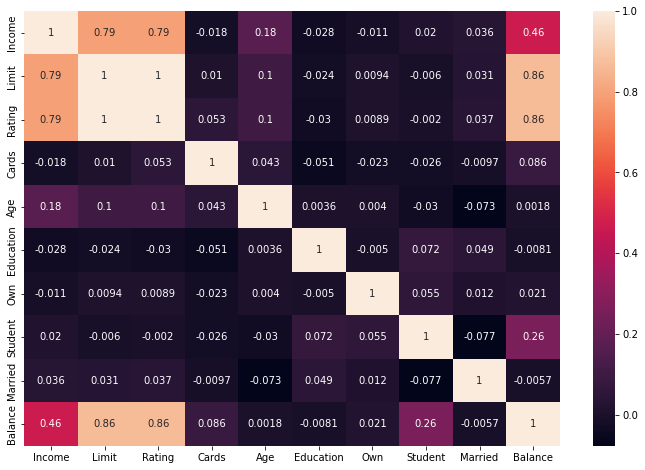

In [55]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

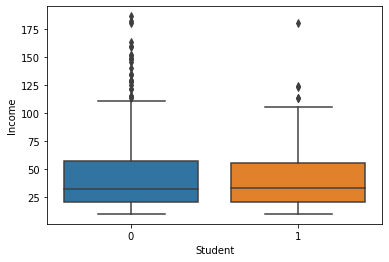

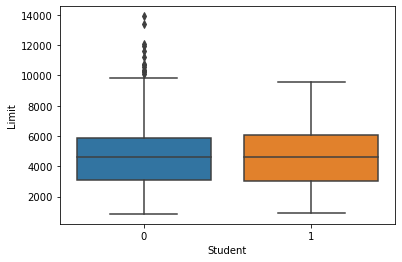

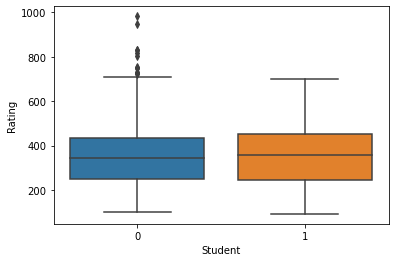

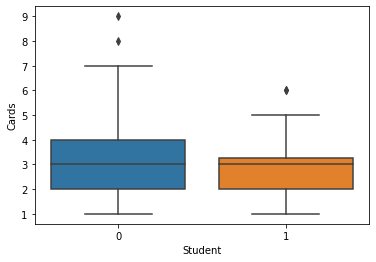

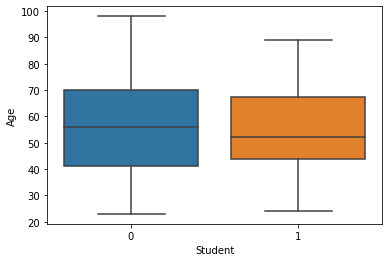

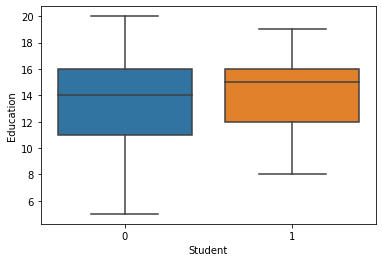

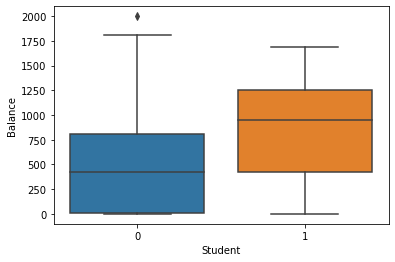

In [56]:
for _ in df.columns.drop(['Own', 'Student', 'Married']):
    sns.boxplot(x=df.Student, y=df[_])
    plt.show()

2) Perform a Logistic Regression and use the summary function to show the results. Describe which variables are statistically significant. Divide data in proportion 80/20 (Train/Test).

In [57]:
df.head(1)

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Balance
0,14.891,3606,283,2,34,11,0,0,1,333


In [58]:
formula = 'Student ~ ' + ' + '.join(df.drop(['Student', 'Own', 'Married'], axis=1).columns)
logit_model = smf.logit(formula=formula, data=df).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.017382
         Iterations 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Student   No. Observations:                  400
Model:                          Logit   Df Residuals:                      392
Method:                           MLE   Df Model:                            7
Date:                Wed, 13 Apr 2022   Pseudo R-squ.:                  0.9465
Time:                        23:40:31   Log-Likelihood:                -6.9528
converged:                       True   LL-Null:                       -130.03
Covariance Type:            nonrobust   LLR p-value:                 1.818e-49
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.5484      7.897      1.969      0.049       0.070      31.027
Income         0.8006      0.396      2.024      0.043       0.025       1.576
Limit         -0.0199      0.013     -1.502      0.133      -0.046       0.006
Rating        -0.1683      0.136     -1.233      0.218      -0.436       0.099
Cards         -0.1110      1.095     -0.101      0.919      -2.258       2.036
Age            0.1344      0.094      1.429      0.153      -0.050       0.319
Education      0.2602      0.313      0.832      0.405      -0.353       0.873
Balance        0.1299      0.069      1.895      0.058      -0.004       0.264
==============================================================================

Possibly complete quasi-separation: A fraction 0.91 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [59]:
pd.DataFrame({'p>|z|': logit_model.pvalues[logit_model.pvalues < 0.05].drop('Intercept')})

,p>|z|
Income,0.042993


In [60]:
X = df.drop('Student', axis=1)
y = df.Student
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
print(len(X_train),'\n', len(X_test))

320 
 80


3) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression

In [62]:
def print_conf_matrix_stats(conf_mtrx):
    acc = (conf_mtrx[0][0] + conf_mtrx[1][1]) / (conf_mtrx[0][0] + conf_mtrx[0][1] + conf_mtrx[1][0] + conf_mtrx[1][1])
    npv = (conf_mtrx[0][0] / (conf_mtrx[0][0] + conf_mtrx[0][1]))
    ppv = (conf_mtrx[1][1] / (conf_mtrx[1][0] + conf_mtrx[1][1]))
    tpr = (conf_mtrx[1][1] / (conf_mtrx[0][1] + conf_mtrx[1][1]))
    tnr = (conf_mtrx[0][0] / (conf_mtrx[0][0] + conf_mtrx[1][0]))
    print('accuracy: {}'.format(acc))
    print('npv: {}'.format(npv))
    print('ppv: {}'.format(ppv))
    print('tpr: {}'.format(tpr))
    print('tnr: {}'.format(tnr))

In [63]:
preds = (logit_model.predict(df) > 0.5)
conf_mtrx = metrics.confusion_matrix(preds, df['Student'])
print_conf_matrix_stats(conf_mtrx)
pd.DataFrame(conf_mtrx, columns=['Pred 0', 'Pred 1'], index=['Real 0', 'Real 1'])

accuracy: 0.99
npv: 0.9944444444444445
ppv: 0.95
tpr: 0.95
tnr: 0.9944444444444445


,Pred 0,Pred 1
Real 0,358,2
Real 1,2,38


In [64]:
preds = (logit_model.predict(df) > 0.6)
conf_mtrx = metrics.confusion_matrix(preds, df['Student'])
print_conf_matrix_stats(conf_mtrx)
pd.DataFrame(conf_mtrx, columns=['Pred 0', 'Pred 1'], index=['Real 0', 'Real 1'])

accuracy: 0.9925
npv: 0.9944598337950139
ppv: 0.9743589743589743
tpr: 0.95
tnr: 0.9972222222222222


,Pred 0,Pred 1
Real 0,359,2
Real 1,1,38


As we can see from confusion matrix our preddicting rate is really good there is only few mistaked that maded my the model

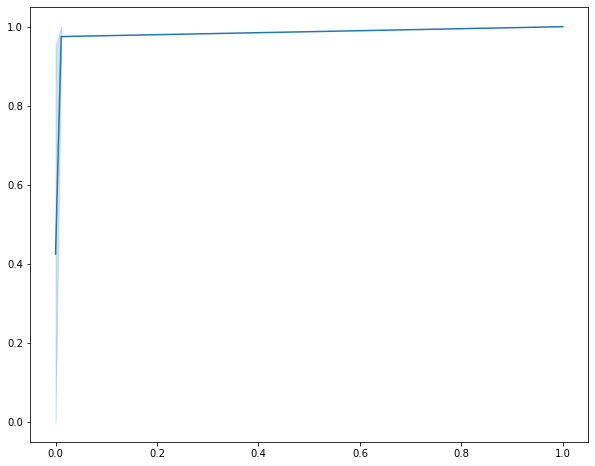

In [65]:
fpr, tpr, thresh = metrics.roc_curve(df['Student'], logit_model.predict(df))

plt.figure(figsize = (10, 8))
sns.lineplot(x=fpr, y=tpr);

The ROC plot showing us that you can take really small number of false predicted values and the true predicted values are pretty high as well as you can see from confusion matrix

3) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression

In [66]:
df

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Balance
0,14.891,3606,283,2,34,11,0,0,1,333
1,106.025,6645,483,3,82,15,1,1,1,903
2,104.593,7075,514,4,71,11,0,0,0,580
3,148.924,9504,681,3,36,11,1,0,0,964
4,55.882,4897,357,2,68,16,0,0,1,331
...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,0,0,1,560
396,13.364,3838,296,5,65,17,0,0,0,480
397,57.872,4171,321,5,67,12,1,0,1,138
398,37.728,2525,192,1,44,13,0,0,1,0


In [67]:
X = df
y = df.Student
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
formula = 'Student ~ Income'
logit_model = smf.logit(formula=formula, data=X_train).fit()
preds = (logit_model.predict(X_test) > 0.5)
conf_mtrx = metrics.confusion_matrix(y_test, X_test.Student)
print_conf_matrix_stats(conf_mtrx)
pd.DataFrame(conf_mtrx, columns=['Pred 0', 'Pred 1'], index=['True 0', 'True 1'])

Optimization terminated successfully.
         Current function value: 0.310930
         Iterations 6
accuracy: 1.0
npv: 1.0
ppv: 1.0
tpr: 1.0
tnr: 1.0


,Pred 0,Pred 1
True 0,70,0
True 1,0,10


If we would use only Income as predictor we can see on the train accuracy that equals to 100% which means that our machine doesnt make any mistakes

4) Repeat the step 2-3 with LDA.

In [69]:
lda = LinearDiscriminantAnalysis()
lda.fit(pd.DataFrame(X_train.Income), y_train)
preds = lda.predict(pd.DataFrame(X_test.Income))
conf_mtrx = metrics.confusion_matrix(preds, y_test)
print_conf_matrix_stats(conf_mtrx)
pd.DataFrame(conf_mtrx, columns=['Pred 0', 'Pred 1'], index=['True 0', 'True 1'])

accuracy: 0.875
npv: 0.875
ppv: nan
tpr: 0.0
tnr: 1.0


/var/folders/fn/r27rm5xd5hj3qhwv5k7rh6hc0000gn/T/ipykernel_1978/272061477.py:4: RuntimeWarning: invalid value encountered in long_scalars
  ppv = (conf_mtrx[1][1] / (conf_mtrx[1][0] + conf_mtrx[1][1]))


,Pred 0,Pred 1
True 0,70,10
True 1,0,0


With LDA our result gets lower accuracy, we can see that there are 10 false positive values, and accuracy about 85$

5) Repeat the step 2-3 with QDA.

In [70]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(pd.DataFrame(X_train.Income), y_train)
preds = qda.predict(pd.DataFrame(X_test.Income))
conf_mtrx = metrics.confusion_matrix(preds, y_test)
print_conf_matrix_stats(conf_mtrx)
pd.DataFrame(conf_mtrx, columns=['Pred 0', 'Pred 1'], index=['True 0', 'True 1'])

accuracy: 0.875
npv: 0.875
ppv: nan
tpr: 0.0
tnr: 1.0


/var/folders/fn/r27rm5xd5hj3qhwv5k7rh6hc0000gn/T/ipykernel_1978/272061477.py:4: RuntimeWarning: invalid value encountered in long_scalars
  ppv = (conf_mtrx[1][1] / (conf_mtrx[1][0] + conf_mtrx[1][1]))


,Pred 0,Pred 1
True 0,70,10
True 1,0,0


As we can see the same result as LDA we get from QDA

6) Repeat the step 2-3 with KNN (k=1,5,10)

In [71]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(pd.DataFrame(X_train.Income), y_train)
preds = knn.predict(pd.DataFrame(X_test.Income))
conf_mtrx = metrics.confusion_matrix(preds, y_test)
print_conf_matrix_stats(conf_mtrx)
pd.DataFrame(conf_mtrx, columns=['Pred 0', 'Pred 1'], index=['True 0', 'True 1'])

accuracy: 0.75
npv: 0.8571428571428571
ppv: 0.0
tpr: 0.0
tnr: 0.8571428571428571


,Pred 0,Pred 1
True 0,60,10
True 1,10,0


In [72]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(pd.DataFrame(X_train.Income), y_train)
preds = knn.predict(pd.DataFrame(X_test.Income))
conf_mtrx = metrics.confusion_matrix(preds, y_test)
print_conf_matrix_stats(conf_mtrx)
pd.DataFrame(conf_mtrx, columns=['Pred 0', 'Pred 1'], index=['True 0', 'True 1'])

accuracy: 0.875
npv: 0.875
ppv: nan
tpr: 0.0
tnr: 1.0


/var/folders/fn/r27rm5xd5hj3qhwv5k7rh6hc0000gn/T/ipykernel_1978/272061477.py:4: RuntimeWarning: invalid value encountered in long_scalars
  ppv = (conf_mtrx[1][1] / (conf_mtrx[1][0] + conf_mtrx[1][1]))


,Pred 0,Pred 1
True 0,70,10
True 1,0,0


In [73]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(pd.DataFrame(X_train.Income), y_train)
preds = knn.predict(pd.DataFrame(X_test.Income))
conf_mtrx = metrics.confusion_matrix(preds, y_test)
print_conf_matrix_stats(conf_mtrx)
pd.DataFrame(conf_mtrx, columns=['Pred 0', 'Pred 1'], index=['True 0', 'True 1'])

accuracy: 0.875
npv: 0.875
ppv: nan
tpr: 0.0
tnr: 1.0


/var/folders/fn/r27rm5xd5hj3qhwv5k7rh6hc0000gn/T/ipykernel_1978/272061477.py:4: RuntimeWarning: invalid value encountered in long_scalars
  ppv = (conf_mtrx[1][1] / (conf_mtrx[1][0] + conf_mtrx[1][1]))


,Pred 0,Pred 1
True 0,70,10
True 1,0,0


Its pretty clear for us that Logistic regression model has the highest accuracy score and pretty fit for binary classification like this

7) Compare the results of Logistic Regression, LDA, QDA and best KNN. Describe and comment the comparison.

### Logistic Regression
accuracy: 1.0
npv: 1.0
ppv: 1.0
tpr: 1.0
tnr: 1.0

### LDA
accuracy: 0.875
npv: 0.875
ppv: nan
tpr: 0.0
tnr: 1.0

### QDA
accuracy: 0.875
npv: 0.875
ppv: nan
tpr: 0.0
tnr: 1.0

### KNN(5-neighbors)
accuracy: 0.875
npv: 0.875
ppv: nan
tpr: 0.0
tnr: 1.0

So here we can compare all 4 models and for us its pretty clear that the best accuracy 100% shows Logistic Regrresion

9) Repeat the step 2-3 with 5-fold and 10-fold cross validation.

In [74]:
errs = []
for train_idx, test_idx in model_selection.KFold(n_splits=5).split(df):
    logit_model = smf.logit(formula='Student ~ Income', data=df).fit()
    errs.append(((logit_model.predict(df) > 0.5) == df.Student).mean())

Optimization terminated successfully.
         Current function value: 0.324896
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.324896
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.324896
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.324896
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.324896
         Iterations 6


In [75]:
errs = []
for train_idx, test_idx in model_selection.KFold(n_splits=10).split(df):
    logit_model = smf.logit(formula='Student ~ Income', data=df).fit()
    errs.append(((logit_model.predict(df) > 0.5) == df.Student).mean())

Optimization terminated successfully.
         Current function value: 0.324896
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.324896
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.324896
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.324896
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.324896
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.324896
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.324896
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.324896
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.324896
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.324896
  

10) Compare the results of Logistic Regression with 80/20, 5-fold, 10-fold. Describe and comment the comparison.

In [76]:
errs = []
for train_idx, test_idx in model_selection.KFold(n_splits=5, shuffle=True).split(df):
    logit_model = smf.logit(formula='Student ~ Income', data=X_train).fit()
    errs.append(((logit_model.predict(X_test) > 0.5) == y_test).mean())

Optimization terminated successfully.
         Current function value: 0.310930
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.310930
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.310930
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.310930
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.310930
         Iterations 6


In [77]:
errs = []
for train_idx, test_idx in model_selection.KFold(n_splits=10).split(df):
    logit_model = smf.logit(formula='Student ~ Income', data=X_train).fit()
    errs.append(((logit_model.predict(X_test) > 0.5) == y_test).mean())

Optimization terminated successfully.
         Current function value: 0.310930
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.310930
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.310930
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.310930
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.310930
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.310930
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.310930
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.310930
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.310930
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.310930
  

# Task 2
The data used in this task is Credit.
y = balance
x = all other variables
### Tasks to do:
1. Split the data set into a training set and a test set.
2. Fit a linear model using least squares on the training set and report the test error obtained.
3. Fit a ridge regression model on the training set, with λ chosen by 10-fold cross-validation. Report the test
error obtained, along with the coefficient estimates.
4. Fit a lasso model on the training set, with λ chosen by 10-fold cross-validation. Report the test error obtained,
along with the number of non-zero coefficient estimates
5. Fit a PCR model on the training set, with M chosen by 10-fold cross-validation. Report the test error
obtained, along with the value of M selected by cross-validation.
6. Fit a PLS model on the training set, with M chosen by 10-fold cross-validation. Report the test error obtained,
along with the value of M selected by cross-validation.
7. Compare the results obtained in steps 2-6. Describe and comment the comparison.

In [78]:
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn import model_selection, metrics, linear_model, decomposition, cross_decomposition, datasets
from itertools import combinations
import time 

In [79]:
df.head(1)

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Balance
0,14.891,3606,283,2,34,11,0,0,1,333


1) Split the data set into a training set and a test set.

In [80]:
train, test = model_selection.train_test_split(df, test_size=0.2)

2) Fit a linear model using least squares on the training set and report the test error obtained.

In [81]:
f = 'Balance ~ ' + ' + '.join(train.drop(['Balance', 'Own', 'Student', 'Married'], axis=1).columns)
model = smf.ols(formula=f, data=train).fit()

test_error_ols = np.sqrt(metrics.mean_squared_error(test['Balance'], model.predict(test)))
print('RMSE: {}'.format(test_error_ols))

RMSE: 150.68412723456862


3) Fit a ridge regression model on the training set, with λ chosen by 10-fold cross-validation. Report the test error obtained, along with the coefficient estimates.

<AxesSubplot:xlabel='lambda', ylabel='RMSE'>

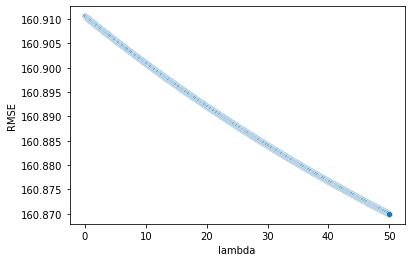

In [82]:
results = pd.DataFrame()
alpha_range = np.linspace(10**-3, 50, num=1000)
for train_idx, test_idx in model_selection.KFold(n_splits=10).split(df):
    train, test = df.iloc[train_idx], df.iloc[test_idx]
    errors = []
    for alpha in alpha_range:
        reg = linear_model.Ridge(alpha=alpha)
        reg.fit(train.drop(['Balance', 'Own', 'Student', 'Married'], axis=1), train['Balance'])
        error = np.sqrt(metrics.mean_squared_error(test['Balance'], reg.predict(test.drop(['Balance', 'Own', 'Student', 'Married'], axis=1))))
        errors.append(error)
    results = pd.concat([results, pd.DataFrame(errors, index=alpha_range).T], axis=0, ignore_index=True)

df_res_1 = pd.DataFrame({'lambda' : alpha_range, 'RMSE' : results.mean()})
sns.scatterplot(x='lambda', y='RMSE', data=df_res_1)

In [83]:
test_error_ridge = df_res_1.sort_values('RMSE', ascending=True)['RMSE'].iloc[0]
print('RMSE: {}'.format(test_error_ridge))

RMSE: 160.86997366959662


4) Fit a lasso model on the training set, with λ chosen by 10-fold cross-validation. Report the test error obtained, along with the number of non-zero coefficient estimates

<AxesSubplot:xlabel='lambda', ylabel='RMSE'>

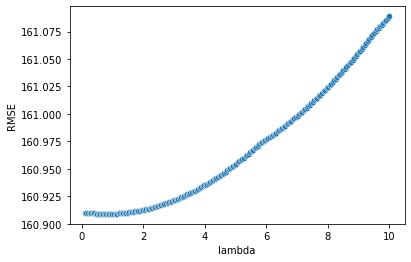

In [84]:
results = pd.DataFrame()
alpha_range = np.linspace(0.1, 10, num=200)
for train_idx, test_idx in model_selection.KFold(n_splits=10).split(df):
    train, test = df.iloc[train_idx], df.iloc[test_idx]
    errors = []
    for alpha in alpha_range:
        reg = linear_model.Lasso(alpha=alpha, max_iter=1000000)
        reg.fit(train.drop(['Balance', 'Own', 'Student', 'Married'], axis=1), train['Balance'])
        error = np.sqrt(metrics.mean_squared_error(test['Balance'], reg.predict(test.drop(['Balance', 'Own', 'Student', 'Married'], axis=1))))
        errors.append(error)
    results = pd.concat([results, pd.DataFrame(errors, index=alpha_range).T], axis=0, ignore_index=True)
    

df_res_2 = pd.DataFrame({'lambda' : alpha_range, 'RMSE' : results.mean()})
sns.scatterplot(x='lambda', y='RMSE', data=df_res_2)

In [85]:
test_error_lasso = df_res_2.sort_values('RMSE', ascending=True)['RMSE'].iloc[0]
print('RMSE: {}'.format(test_error_lasso))

RMSE: 160.90889161837117


In [86]:
lmbda, RMSE = df_res_2.sort_values('RMSE', ascending=True).iloc[0]
# best rmse for lasoo
RMSE

160.90889161837117

In [87]:
reg = linear_model.Lasso(alpha=3, max_iter=1000000)
reg.fit(df.drop(['Balance', 'Own', 'Student', 'Married'], axis=1), df['Balance']).coef_

array([-7.56238306,  0.11905676,  2.16543098,  9.44601543, -0.87616432,
        1.67508312])

5) Fit a PCR model on the training set, with M chosen by 10-fold cross-validation. Report the test error obtained, along with the value of M selected by cross-validation.

<AxesSubplot:xlabel='n_components', ylabel='RMSE'>

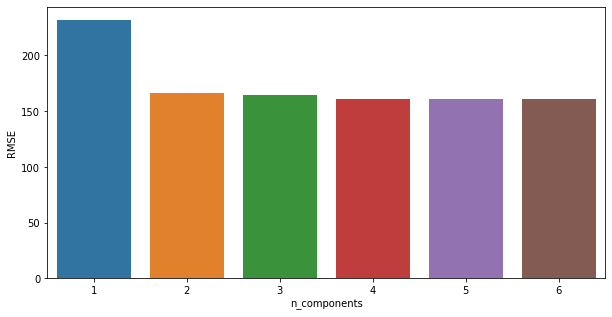

In [88]:
results = pd.DataFrame()
predictors = df.drop(['Balance', 'Own', 'Student', 'Married'], axis=1).columns
c_range = range(1, len(predictors) + 1)
for train_idx, test_idx in model_selection.KFold(n_splits=10).split(df):
    train, test = df.iloc[train_idx], df.iloc[test_idx]
    errors = []
    for c in c_range:
        pca = decomposition.PCA(n_components=c)
        X = pca.fit_transform(train.drop(['Balance', 'Own', 'Student', 'Married'], axis=1))
        reg = linear_model.LinearRegression()
        reg.fit(X, train['Balance'])
        
        test_X = pca.transform(test.drop(['Balance', 'Own', 'Student', 'Married'], axis=1))
        error = np.sqrt(metrics.mean_squared_error(test['Balance'], reg.predict(test_X)))
        errors.append(error)
    results = pd.concat([results, pd.DataFrame(errors, index=c_range).T], axis=0, ignore_index=True)

df_pcr = pd.DataFrame({'n_components' : c_range, 'RMSE' : results.mean()})
plt.figure(figsize = (10, 5))
sns.barplot(x='n_components', y='RMSE', data=df_pcr)

In [89]:
test_error_pcr = df_pcr.sort_values('RMSE', ascending=True).iloc[0]['RMSE']
print('RMSE: {}'.format(test_error_pcr))

RMSE: 160.91056273741836


6) Fit a PLS model on the training set, with M chosen by 10-fold cross-validation. Report the test error obtained, along with the value of M selected by cross-validation.

<AxesSubplot:xlabel='n_components', ylabel='RMSE'>

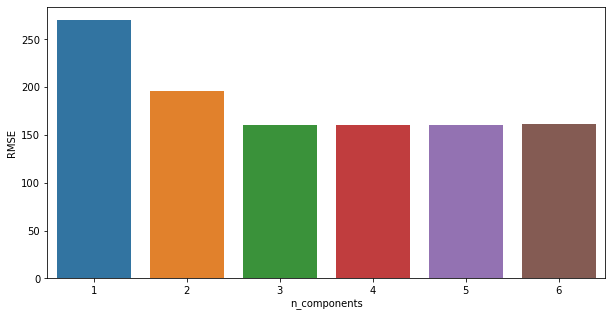

In [90]:
results = pd.DataFrame()
predictors = df.drop(['Balance', 'Own', 'Student', 'Married'], axis=1).columns
c_range = range(1, len(predictors) + 1)
for train_idx, test_idx in model_selection.KFold(n_splits=10).split(df):
    train, test = df.iloc[train_idx], df.iloc[test_idx]
    errors = []
    for c in c_range:
        reg = cross_decomposition.PLSRegression(n_components=c)
        reg.fit(train.drop(['Balance', 'Own', 'Student', 'Married'], axis=1), train['Balance'])
        error = np.sqrt(metrics.mean_squared_error(test['Balance'], reg.predict(test.drop(['Balance', 'Own', 'Student', 'Married'], axis=1))))
        errors.append(error)
    results = pd.concat([results, pd.DataFrame(errors, index=c_range).T], axis=0, ignore_index=True)

df_pls = pd.DataFrame({'n_components' : c_range, 'RMSE' : results.mean()})
plt.figure(figsize=(10,5))
sns.barplot(x='n_components', y='RMSE', data=df_pls)

In [91]:
test_error_pls = df_pls.sort_values('RMSE', ascending=True).iloc[0]['RMSE']
print('RMSE: {}'.format(test_error_pls))

RMSE: 160.24442717901724


7) Compare the results obtained in steps 2-6. Describe and comment the comparison.

<AxesSubplot:xlabel='model', ylabel='rmse'>

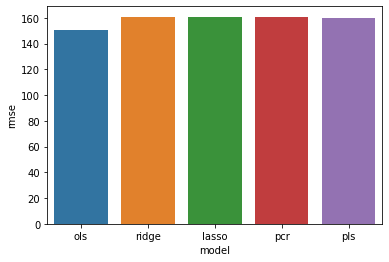

In [92]:
summary = pd.DataFrame({'rmse' : [test_error_ols, test_error_ridge, test_error_lasso, test_error_pcr, test_error_pls], \
                        'model': ['ols', 'ridge', 'lasso', 'pcr', 'pls']})

sns.barplot(x='model', y= 'rmse', data=summary)

In [93]:
summary.sort_values('rmse', ascending=True)

,rmse,model
0,150.684127,ols
4,160.244427,pls
1,160.869974,ridge
2,160.908892,lasso
3,160.910563,pcr


In [94]:
df['Balance'].mean()

520.015